<a href="https://colab.research.google.com/github/lacteavian/Machine-Learning/blob/deniz-ozkaya---VBK/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine

Destek Vektör Makinesi (SVM), birçok makine öğrenimi uygulamasında sınıflandırma ve regresyon problemleri için kullanılan bir algoritmadır. SVM, verileri sınıflara ayırmak için kullanılır ve özellikle sınıflar arasındaki belirgin ve en iyi ayrım çizgisini bulmak amacıyla çalışır.

SVM, bir sınıflandırma probleminde veri noktalarını iki farklı sınıfa ayırmak için bir hiperdüzlem (hiperplane) oluşturur. Bu hiperdüzlem, veri noktalarını mümkün olduğunca iyi şekilde ayırmak için en geniş marjı (margin) maksimize eder. Bu sayede, yeni veri noktalarını sınıflandırırken daha iyi genelleme yapabilir.


Destek Vektör Makinesi (SVM), birçok makine öğrenimi uygulamasında sınıflandırma ve regresyon problemleri için kullanılan bir algoritmadır. SVM, verileri sınıflara ayırmak için kullanılır ve özellikle sınıflar arasındaki belirgin ve en iyi ayrım çizgisini bulmak amacıyla çalışır.

SVM, bir sınıflandırma probleminde veri noktalarını iki farklı sınıfa ayırmak için bir hiperdüzlem (hiperplane) oluşturur. Bu hiperdüzlem, veri noktalarını mümkün olduğunca iyi şekilde ayırmak için en geniş marjı (margin) maksimize eder. Bu sayede, yeni veri noktalarını sınıflandırırken daha iyi genelleme yapabilir.

SVM'nin bazı avantajları şunlardır:


1. İyi genelleme: Belirgin sınıfları ayırmak için kullanılan geniş marj, yeni
veri noktalarını doğru bir şekilde sınıflandırmada yardımcı olabilir.
2. Etkili çok boyutlu uzayda çalışma: SVM, yüksek boyutlu veri setlerinde de etkili bir şekilde çalışabilir. Bu özellik, özelliklerin çoklu olabileceği geniş veri setlerinde kullanışlıdır.
3. Çoklu çekirdek fonksiyonları: SVM'nin farklı çekirdek (kernel) fonksiyonları kullanarak farklı veri tiplerine ve yapılarına uyum sağlama yeteneği vardır.

SVM'nin kullanım alanları şunlardır:

1. Sınıflandırma: Örneğin, metin sınıflandırma, tıbbi teşhisler, görüntü tanıma gibi alanlarda kullanılabilir.
Regresyon: Sayısal verilerde tahmin yapmak için kullanılabilir.
2. Anomali tespit: Veri setindeki anormallikleri tespit etmek için kullanılabilir, örneğin, hatalı işlemleri veya anormal davranışları belirlemek için.

SVM'nin bu esnekliği ve etkinliği, geniş bir uygulama yelpazesi bulmasını sağlamaktadır. Ancak, büyük veri setlerinde eğitim süreleri ve bellek gereksinimleri bazen dezavantaj olarak karşımıza çıkabilir.

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

Text(0.5, 1.0, 'Synthetic Dataset with Two Classes')

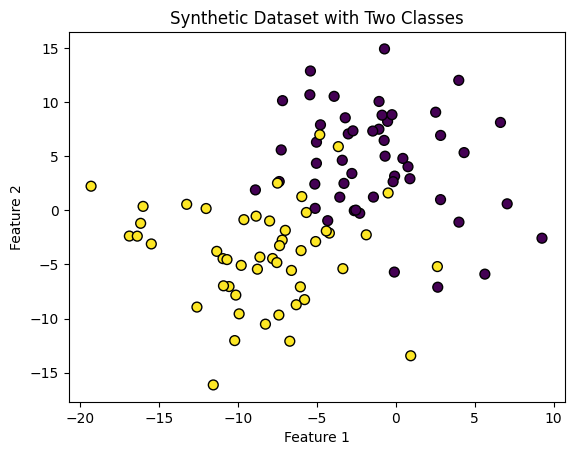

In [23]:
# iki sınıf içeren sentetik bir veri oluşturalım
X, y = make_blobs(n_samples=100, centers=2, random_state=1, cluster_std=5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Dataset with Two Classes')

In [24]:
# train ve test setlerini ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# support vector machine sınıflandırıcısını uygulayalım
svm = SVC(kernel='linear')

SVM'nin temel amacı, veri noktalarını bir hiperdüzlem ile sınıflara ayırmaktır. Ancak, bazen veri noktalarını doğrusal bir hiperdüzlemle ayırmak mümkün olmayabilir. Bu durumda, kernel fonksiyonları devreye girer. Kernel fonksiyonları, verilerin orijinal uzayından farklı bir uzayda (çoğunlukla daha yüksek boyutlu bir uzayda) işlem yapmayı mümkün kılar. Bu işlem, verilerin doğrusal olarak ayrılabilir hale gelmesine olanak tanır.

In [26]:
# Train the SVM model
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [27]:
# Make predictions on the test set
y_pred = svm.predict(X_test)

In [28]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM model: {accuracy:.2f}")

Accuracy of the SVM model: 0.90


In [29]:
# Sınıflandırma raporu
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.83      0.91        12

    accuracy                           0.90        20
   macro avg       0.90      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20



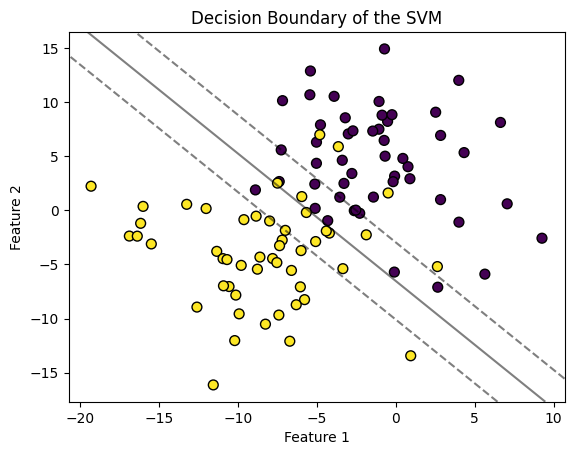

In [30]:
# Plot the decision boundary
def plot_decision_boundary(clf, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('Decision Boundary of the SVM')

plot_decision_boundary(svm, X, y)
plt.show()